<a href="https://colab.research.google.com/github/Maria-Data-Analyst/RRHH_Machine_Learning-/blob/main/regresion_logistica_rrhh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [203]:
df = pd.read_csv('/content/datos_dummy.csv')

LogisticRegression con balanceo de datos undersampling





In [204]:
# Separar las clases
df_majority = df[df.attrition_yes == 0]
df_minority = df[df.attrition_yes == 1]

In [205]:
# Realizar undersampling en la clase mayoritaria para igualar el tamaño de la clase minoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Sin reemplazo
                                   n_samples=len(df_minority),  # Igualar tamaño a la clase minoritaria
                                   random_state=123)  # Para reproducibilidad

In [206]:
# Combinar las clases balanceadas
datos_3 = pd.concat([df_majority_downsampled, df_minority])
# Verificar el balance de clases
print(datos_3.attrition_yes.value_counts())

attrition_yes
0    711
1    711
Name: count, dtype: int64


In [207]:
# Separar características (X) y la variable objetivo (y)
X = datos_3.drop(columns=['attrition_yes'])  # Eliminar la variable objetivo de las características
y = datos_3['attrition_yes']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# Crear el modelo de regresión logística
modelo = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [209]:
# Realizar predicciones
y_pred = modelo.predict(X_test)


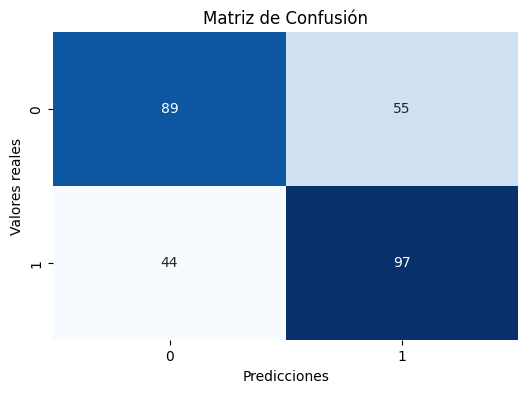

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       144
           1       0.64      0.69      0.66       141

    accuracy                           0.65       285
   macro avg       0.65      0.65      0.65       285
weighted avg       0.65      0.65      0.65       285

Exactitud del modelo: 0.65


In [210]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

In [211]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)

# Calcular y mostrar la exactitud en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}')

Exactitud en el conjunto de entrenamiento: 0.74
Exactitud del modelo en el conjunto de prueba: 0.65


In [212]:
# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})

# Ordenar los coeficientes por su valor (de mayor a menor)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Mostrar todos los coeficientes
pd.set_option('display.max_rows', None)  # Esto asegura que se muestren todas las filas
print(coef_df)



                               Feature  Coefficient
18               marital_status_single     1.111736
4      education_field_human_resources     1.064158
0           business_travel_frequently     1.006388
44        rango_años_en_la_empresa_0_3     0.920539
32                     rango_age_18_25     0.751776
13          job_role_research_director     0.748893
6            education_field_marketing     0.524860
5        education_field_life_sciences     0.394734
41              rango_mismo_jefe_13_17     0.373087
27               rango_num_companies_9     0.345557
7              education_field_medical     0.344592
50              rango_ingresos_40k_70k     0.343726
28               rango_experiencia_0_7     0.324407
17              marital_status_married     0.311905
1               business_travel_rarely     0.311298
37          rango_ultimo_ascenso_12_15     0.305763
16       job_role_sales_representative     0.272705
42                rango_mismo_jefe_5_8     0.208897
53          

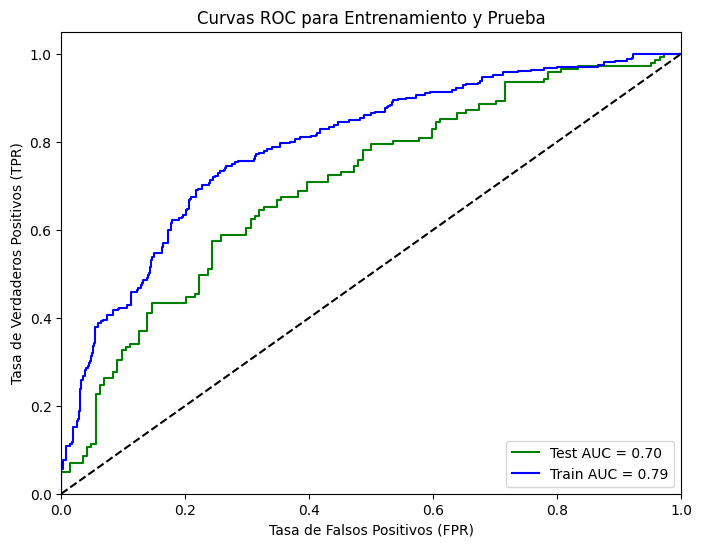

In [213]:
## Calcular la curva ROC y AUC

# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob_test = modelo.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva (1)

# Obtener las probabilidades de predicción para el conjunto de entrenamiento
y_prob_train = modelo.predict_proba(X_train)[:, 1]  # Probabilidad para la clase positiva (1)

# Calcular la curva ROC y AUC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)

# Calcular la curva ROC y AUC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc_train = roc_auc_score(y_train, y_prob_train)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC para el conjunto de prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')

# Curva ROC para el conjunto de entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='blue')

# Línea de referencia para un modelo aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()


LogisticRegression con balanceo tipo undersampling con variables seleccionadas

In [214]:
df = pd.read_csv('/content/datos_dummy.csv')

In [215]:
# Lista de variables que quieres mantener
selected_columns = [
    'rango_años_en_la_empresa_0_3',
    'marital_status_single',
    'gender_male',
    'rango_age_36_48',
    'education_licenciatura',
    'rango_percent_salary_15_18',
    'rango_experiencia_8_16',
    'education_universidad',
    'education_field_medical',
    'rango_percent_salary_11_14',
    'rango_num_companies_3_5',
    'department_research_&_development',
    'job_role_research_scientist',
    'job_role_sales_executive',
    'rango_ingresos_10k_40k',
    'business_travel_frequently',
    "attrition_yes"
]


# Filtrar el DataFrame para quedarse solo con esas columnas
df_filtered = df[selected_columns]

# Verificar que se seleccionaron correctamente las columnas
print(df_filtered.head())


   rango_años_en_la_empresa_0_3  marital_status_single  gender_male  \
0                             1                      0            0   
1                             0                      1            0   
2                             0                      0            1   
3                             0                      0            1   
4                             0                      1            1   

   rango_age_36_48  education_licenciatura  rango_percent_salary_15_18  \
0                0                       0                           0   
1                0                       0                           0   
2                0                       0                           1   
3                1                       0                           0   
4                0                       0                           0   

   rango_experiencia_8_16  education_universidad  education_field_medical  \
0                       0                      1   

In [216]:
# Separar las clases
df_majority = df_filtered[df_filtered.attrition_yes == 0]
df_minority = df_filtered[df_filtered.attrition_yes == 1]

In [217]:
# Realizar undersampling en la clase mayoritaria para igualar el tamaño de la clase minoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Sin reemplazo
                                   n_samples=len(df_minority),  # Igualar tamaño a la clase minoritaria
                                   random_state=123)  # Para reproducibilidad

In [218]:
# Combinar las clases balanceadas
datos_3 = pd.concat([df_majority_downsampled, df_minority])
# Verificar el balance de clases
print(datos_3.attrition_yes.value_counts())

attrition_yes
0    711
1    711
Name: count, dtype: int64


In [219]:
# Separar características (X) y la variable objetivo (y)
X = datos_3.drop(columns=['attrition_yes'])  # Eliminar la variable objetivo de las características
y = datos_3['attrition_yes']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

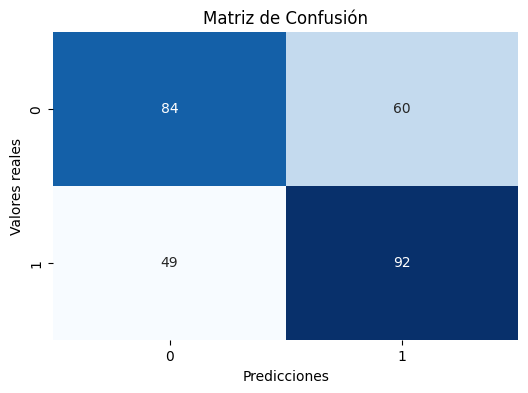

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       144
           1       0.61      0.65      0.63       141

    accuracy                           0.62       285
   macro avg       0.62      0.62      0.62       285
weighted avg       0.62      0.62      0.62       285



In [220]:
# Crear el modelo de regresión logística
modelo = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

In [221]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)

# Calcular y mostrar la exactitud en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}')

Exactitud en el conjunto de entrenamiento: 0.66
Exactitud del modelo en el conjunto de prueba: 0.62


In [222]:
# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})

# Ordenar los coeficientes por su valor (de mayor a menor)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Mostrar todos los coeficientes
pd.set_option('display.max_rows', None)  # Esto asegura que se muestren todas las filas
print(coef_df)

                              Feature  Coefficient
0        rango_años_en_la_empresa_0_3     0.948998
1               marital_status_single     0.924626
15         business_travel_frequently     0.635375
12        job_role_research_scientist     0.211746
10            rango_num_companies_3_5     0.125750
7               education_universidad     0.121646
13           job_role_sales_executive     0.042908
4              education_licenciatura    -0.003153
8             education_field_medical    -0.009405
2                         gender_male    -0.027116
14             rango_ingresos_10k_40k    -0.118458
6              rango_experiencia_8_16    -0.125844
5          rango_percent_salary_15_18    -0.177644
11  department_research_&_development    -0.219054
9          rango_percent_salary_11_14    -0.247776
3                     rango_age_36_48    -0.639978


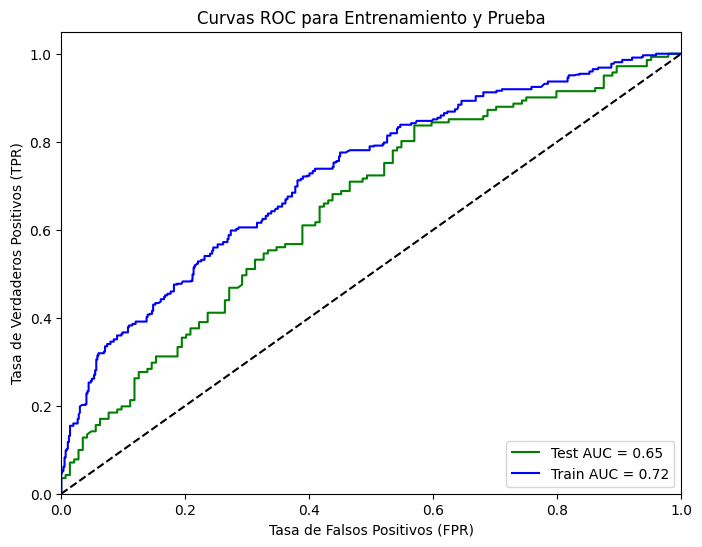

In [223]:
# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob_test = modelo.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva (1)

# Obtener las probabilidades de predicción para el conjunto de entrenamiento
y_prob_train = modelo.predict_proba(X_train)[:, 1]  # Probabilidad para la clase positiva (1)

# Calcular la curva ROC y AUC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)

# Calcular la curva ROC y AUC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc_train = roc_auc_score(y_train, y_prob_train)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC para el conjunto de prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')

# Curva ROC para el conjunto de entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='blue')

# Línea de referencia para un modelo aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()




LogisticRegression con balanceo de datos SMOTE

In [224]:
df = pd.read_csv('/content/datos_dummy.csv')

In [225]:
# Ver la distribución de la variable objetivo
print("Distribución de la variable objetivo:")
print(df['attrition_yes'].value_counts())

Distribución de la variable objetivo:
attrition_yes
0    3699
1     711
Name: count, dtype: int64


In [226]:
# Dividir en características (X) y variable objetivo (y)
X = df.drop('attrition_yes', axis=1)
y = df['attrition_yes']

In [227]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [229]:
# Ver las nuevas distribuciones de las clases
print("Distribución de la variable objetivo después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Distribución de la variable objetivo después de SMOTE:
attrition_yes
0    2584
1    2584
Name: count, dtype: int64


In [230]:
# Crear el clasificador de regresión logística
model = LogisticRegression(random_state=42)

In [231]:
# Entrenar el modelo con el conjunto de datos balanceado
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

Exactitud en el conjunto de entrenamiento: 0.82
Exactitud en el conjunto de prueba: 0.80

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1115
           1       0.38      0.43      0.41       208

    accuracy                           0.80      1323
   macro avg       0.64      0.65      0.64      1323
weighted avg       0.81      0.80      0.81      1323



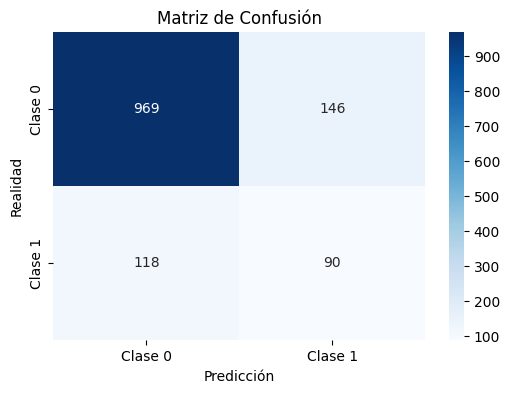

Matriz de Confusión:
[[969 146]
 [118  90]]


In [232]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train_resampled, model.predict(X_train_resampled))

# Calcular la exactitud en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
print(f'Exactitud en el conjunto de prueba: {test_accuracy:.2f}')

# Evaluar el modelo con la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("\nInforme de Clasificación:")
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

In [233]:
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)

# Mostrar las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print(f'Exactitud media de validación cruzada: {cv_scores.mean():.2f}')


Puntuaciones de validación cruzada: [0.6450677  0.844294   0.85783366 0.84027106 0.84607938]
Exactitud media de validación cruzada: 0.81


In [234]:
# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]

# Crear un DataFrame para visualizar los coeficientes
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})

# Ordenar los coeficientes por su valor (de mayor a menor)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Mostrar todos los coeficientes
pd.set_option('display.max_rows', None)  # Esto asegura que se muestren todas las filas
print(coef_df)

                               Feature  Coefficient
0           business_travel_frequently     0.830042
18               marital_status_single     0.604959
1               business_travel_rarely     0.282152
19                         gender_male     0.066527
5        education_field_life_sciences    -0.250509
17              marital_status_married    -0.300592
23               education_universidad    -0.318523
21              education_licenciatura    -0.373416
7              education_field_medical    -0.384680
13          job_role_research_director    -0.412613
6            education_field_marketing    -0.435688
38            rango_ultimo_ascenso_4_7    -0.517380
22                  education_maestría    -0.583260
4      education_field_human_resources    -0.586885
8     education_field_technical_degree    -0.657059
2    department_research_&_development    -0.673438
37          rango_ultimo_ascenso_12_15    -0.730802
44        rango_años_en_la_empresa_0_3    -0.783548
3           

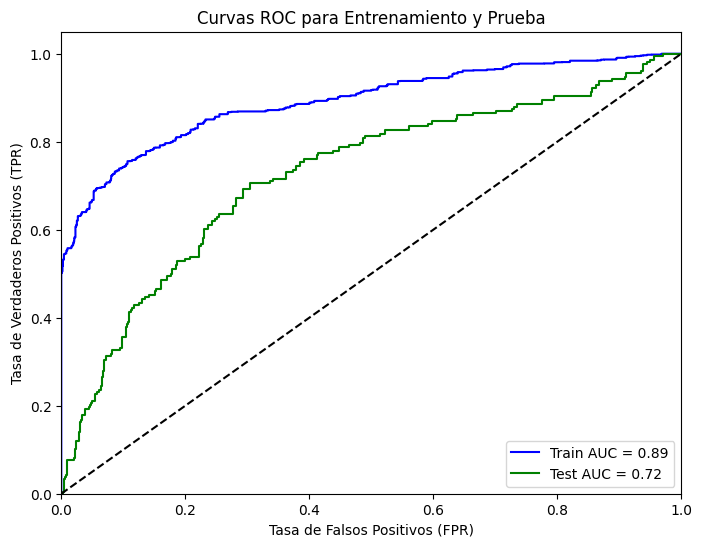

In [235]:
# Obtener las probabilidades de predicción para el conjunto de entrenamiento
y_prob_train = model.predict_proba(X_train_resampled)[:, 1]

# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob_test = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_prob_train)
auc_train = roc_auc_score(y_train_resampled, y_prob_train)

# Calcular la curva ROC y AUC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC para el conjunto de entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='blue')

# Curva ROC para el conjunto de prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')

# Línea de referencia para un modelo aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()


LogisticRegression con balanceo de datos SMOTE y variables especificas

In [237]:
df = pd.read_csv('/content/datos_dummy.csv')

In [239]:
# Lista de variables que quieres mantener
selected_columns = [
 'rango_años_en_la_empresa_0_3',
    'marital_status_single',
    'gender_male',
    'rango_age_36_48',
    'education_licenciatura',
    'rango_percent_salary_15_18',
    'rango_experiencia_8_16',
    'education_universidad',
    'education_field_medical',
    'rango_percent_salary_11_14',
    'rango_num_companies_3_5',
    'department_research_&_development',
    'job_role_research_scientist',
    'job_role_sales_executive',
    'rango_ingresos_10k_40k',
    'business_travel_frequently',
    "attrition_yes"
]

# Filtrar el DataFrame para quedarse solo con esas columnas
df_filtered = df[selected_columns]

# Verificar que se seleccionaron correctamente las columnas
print(df_filtered.head())


   rango_años_en_la_empresa_0_3  marital_status_single  gender_male  \
0                             1                      0            0   
1                             0                      1            0   
2                             0                      0            1   
3                             0                      0            1   
4                             0                      1            1   

   rango_age_36_48  education_licenciatura  rango_percent_salary_15_18  \
0                0                       0                           0   
1                0                       0                           0   
2                0                       0                           1   
3                1                       0                           0   
4                0                       0                           0   

   rango_experiencia_8_16  education_universidad  education_field_medical  \
0                       0                      1   

In [240]:
# Ver la distribución de la variable objetivo
print("Distribución de la variable objetivo:")
print(df_filtered['attrition_yes'].value_counts())


Distribución de la variable objetivo:
attrition_yes
0    3699
1     711
Name: count, dtype: int64


In [241]:
# Dividir en características (X) y variable objetivo (y)
X = df_filtered.drop('attrition_yes', axis=1)
y = df_filtered['attrition_yes']

In [242]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [243]:
# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [244]:
# Ver las nuevas distribuciones de las clases
print("Distribución de la variable objetivo después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Distribución de la variable objetivo después de SMOTE:
attrition_yes
0    2584
1    2584
Name: count, dtype: int64


Exactitud en el conjunto de entrenamiento: 0.65
Exactitud en el conjunto de prueba: 0.65

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.65      0.75      1115
           1       0.25      0.65      0.37       208

    accuracy                           0.65      1323
   macro avg       0.58      0.65      0.56      1323
weighted avg       0.81      0.65      0.69      1323



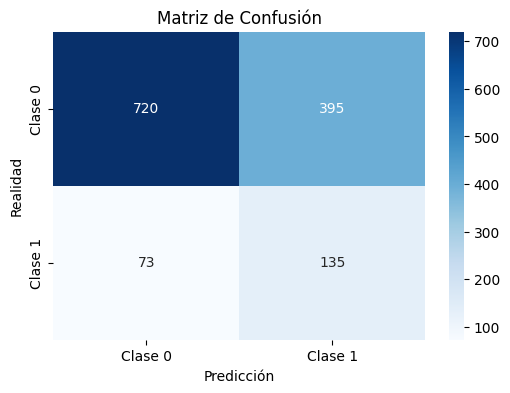

Matriz de Confusión:
[[720 395]
 [ 73 135]]


In [245]:
# Crear el clasificador de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo con el conjunto de datos balanceado
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train_resampled, model.predict(X_train_resampled))

# Calcular la exactitud en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
print(f'Exactitud en el conjunto de prueba: {test_accuracy:.2f}')

# Evaluar el modelo con la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("\nInforme de Clasificación:")
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

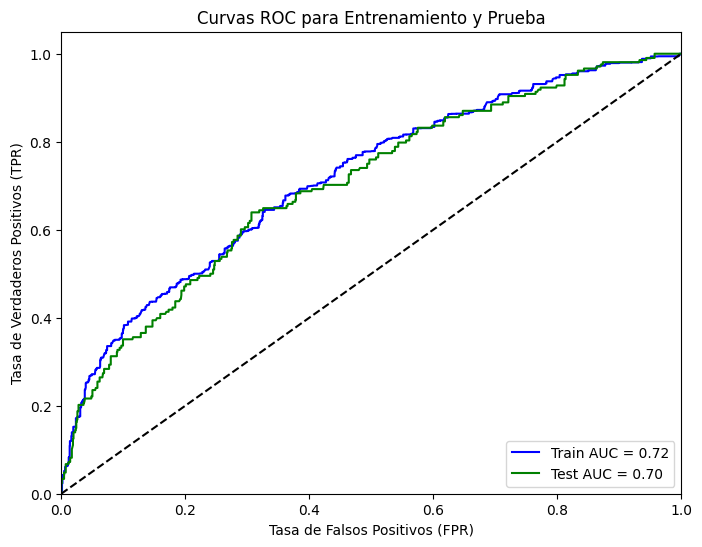

In [246]:
# Obtener las probabilidades de predicción para el conjunto de entrenamiento
y_prob_train = model.predict_proba(X_train_resampled)[:, 1]

# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob_test = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC para el conjunto de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_prob_train)
auc_train = roc_auc_score(y_train_resampled, y_prob_train)

# Calcular la curva ROC y AUC para el conjunto de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = roc_auc_score(y_test, y_prob_test)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC para el conjunto de entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='blue')

# Curva ROC para el conjunto de prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')

# Línea de referencia para un modelo aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Entrenamiento y Prueba')
plt.legend(loc="lower right")
plt.show()

